In [1]:
import os, sys
import torch
import numpy as np
import pandas as pd

sys.path.append(os.path.join(os.getcwd(), '..'))

from ml_stuff.positional_encoding import SinusoidalPositionalEmbedding

from tqdm import tqdm, trange
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
encoder = SinusoidalPositionalEmbedding(10,)
y = torch.zeros((32, 1, 512, 1024)).to(1)
positions = encoder.encode(y)

positions.shape

torch.Size([32, 40, 512, 1024])

dims=[5, 4, 3, 2, 1]


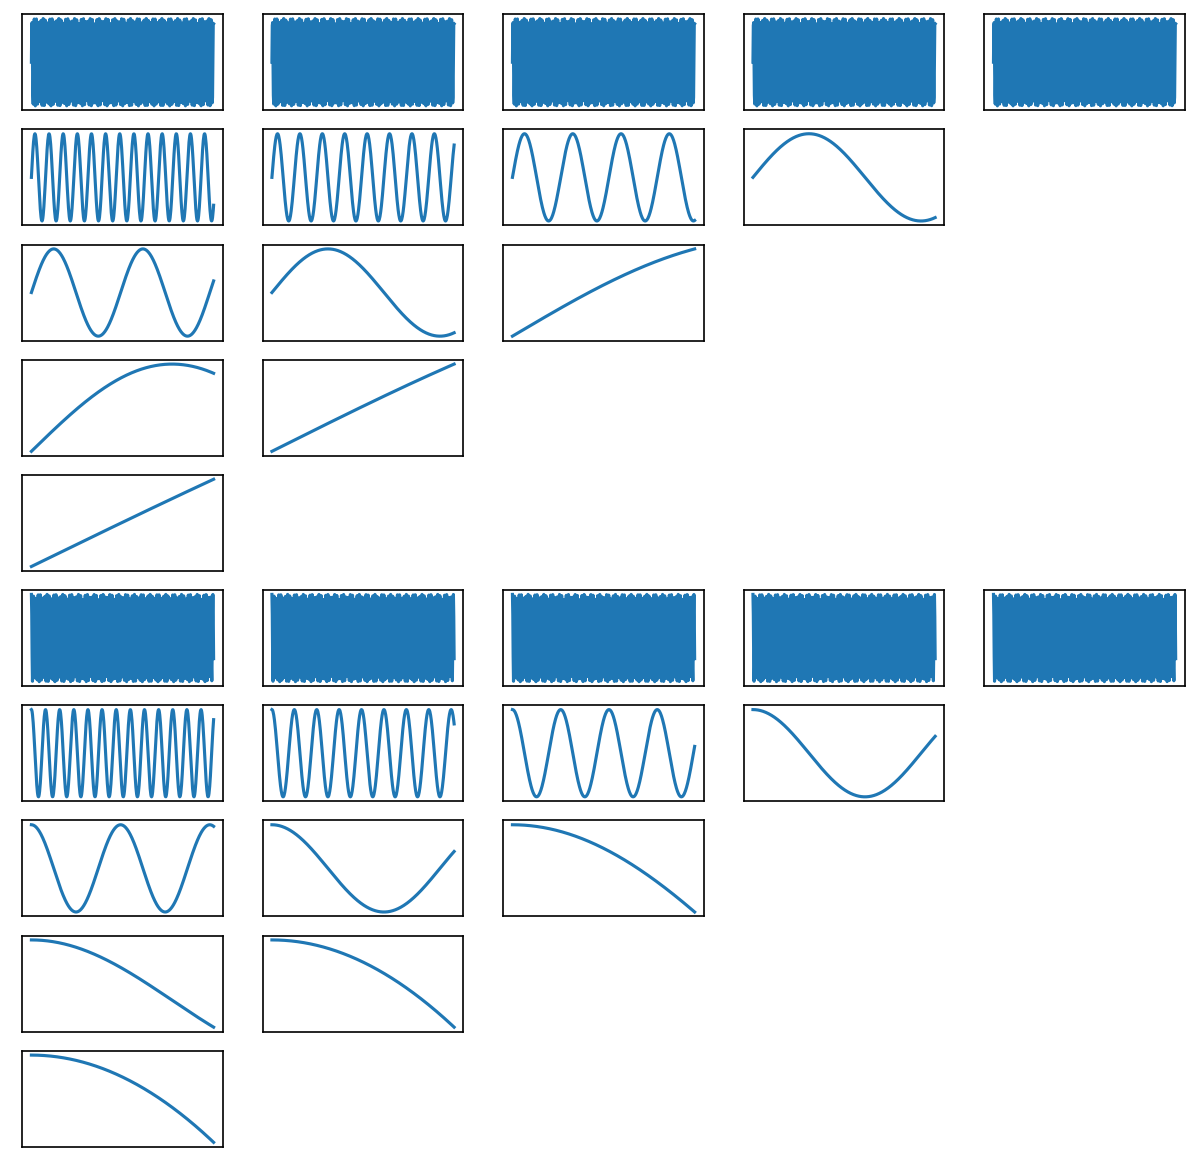

In [2]:
dims = [i for i in range(5, 0, -1)]
print(f'dims={dims}')
fig = plt.figure(figsize=(2 * len(dims), 2 * max(dims)))

for i, dim in enumerate(dims):
    encoder = SinusoidalPositionalEmbedding(dim)
    y = torch.zeros((2, 1, 512,)).to(1)
    positions = encoder.encode(y)

    imgs = positions[0:1, :, :]
    imgs = imgs.detach().cpu().numpy()

    for j in range(imgs.shape[1]):
        modified_j = j + (max(dims) - dim) * (j // dim)
        ax = fig.add_subplot(2 * max(dims), len(dims), i + len(dims) * modified_j + 1)
        im = ax.plot(imgs[0, j, :],)
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

dims=[5, 4, 3, 2, 1]


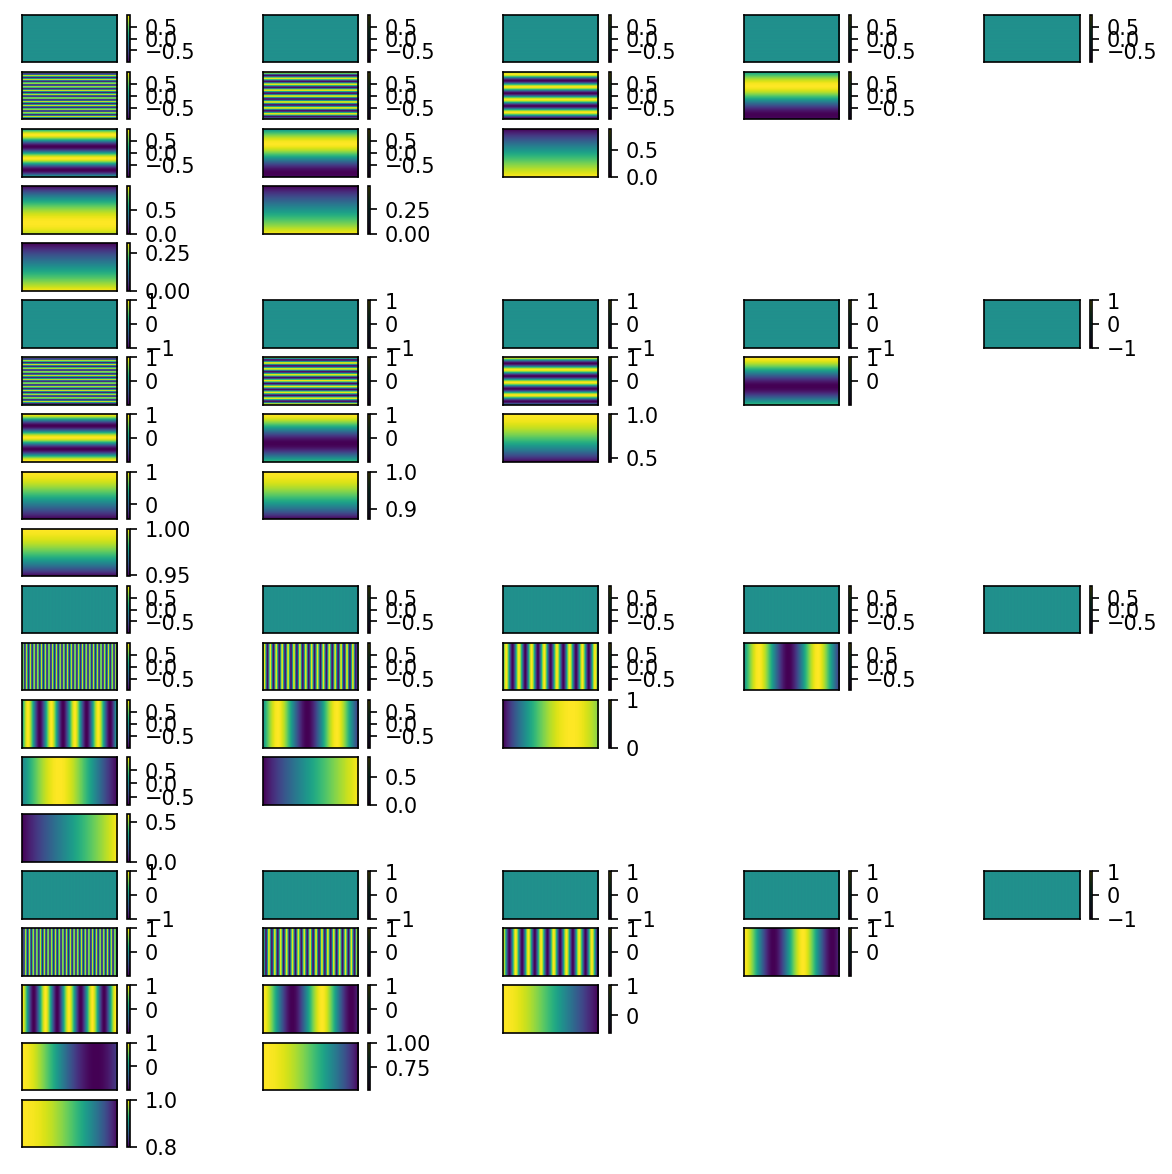

In [3]:
dims = [i for i in range(5, 0, -1)]
print(f'dims={dims}')
fig = plt.figure(figsize=(2 * len(dims), 2 * max(dims)))

for i, dim in enumerate(dims):
    encoder = SinusoidalPositionalEmbedding(dim)
    y = torch.zeros((1, 1, 512, 1024)).to(1)
    positions = encoder.encode(y)

    imgs = positions[0:1, :, :, :]
    imgs = imgs.detach().cpu().numpy()

    for j in range(imgs.shape[1]):
        modified_j = j + (max(dims) - dim) * (j // dim)
        ax = fig.add_subplot(4 * max(dims), len(dims), i + len(dims) * modified_j + 1)
        im = ax.imshow(imgs[0, j, :, :],)
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        fig.colorbar(im, ax=ax, orientation='vertical')

dims=[5, 4, 3, 2, 1]


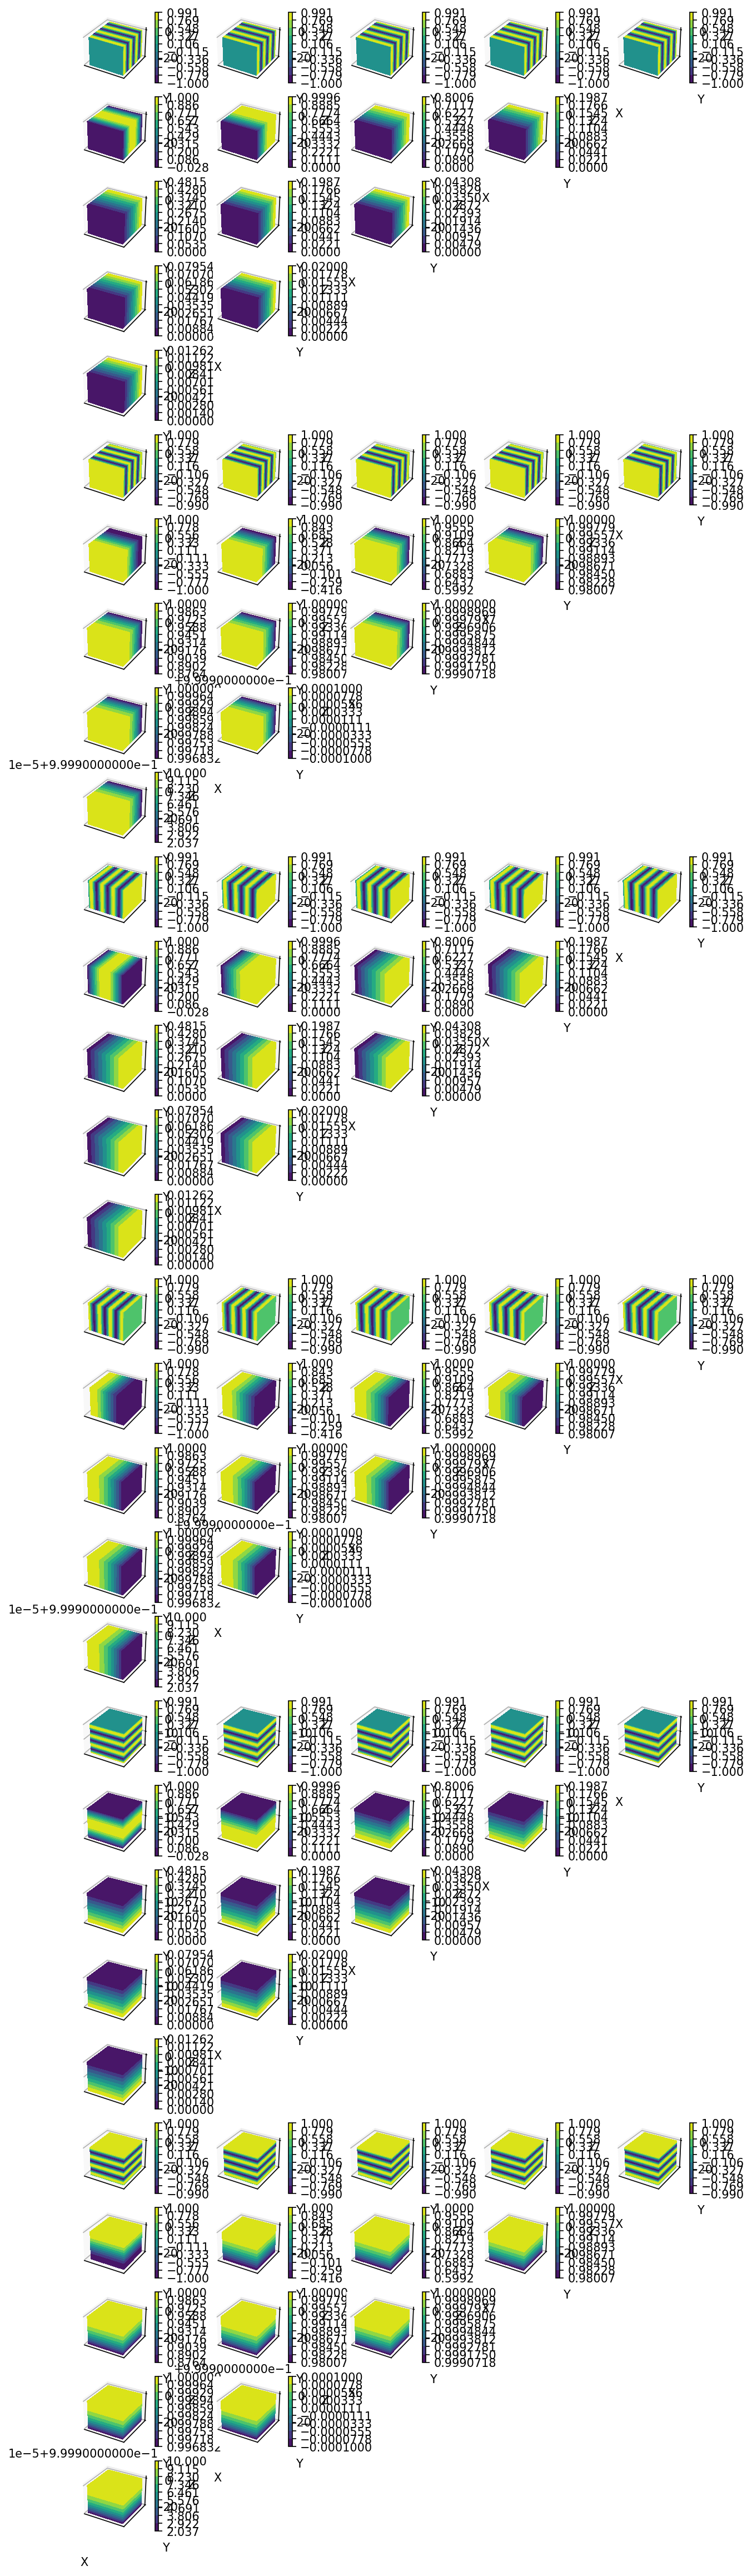

In [4]:
dims = [i for i in range(5, 0, -1)]
print(f'dims={dims}')
fig = plt.figure(figsize=(2 * len(dims), 8 * max(dims)))


for i, dim in enumerate(dims):
    encoder = SinusoidalPositionalEmbedding(dim)
    y = torch.zeros((2, 1, 21, 21, 21)).to(1)
    positions = encoder.encode(y)
    
    X, Y, Z = np.meshgrid(np.arange(21), np.arange(21), -np.arange(21))

    imgs = positions[0:1, :, :, :, :]
    imgs = imgs.detach().cpu().numpy()

    for j in range(imgs.shape[1]):
        modified_j = j + (max(dims) - dim) * (j // dim)
        ax = fig.add_subplot(6 * max(dims), len(dims), i + len(dims) * modified_j + 1, projection='3d')
        
        data = imgs[0, j, :, :, :]
        
        kw = {'vmin': data.min(),
              'vmax': data.max(),
              'levels': np.linspace(data.min(), data.max(), 10),}

        # Plot contour surfaces
        _ = ax.contourf(
            X[:, :, 0], Y[:, :, 0], data[:, :, 0],
            zdir='z', offset=0, **kw)
        _ = ax.contourf(
            X[0, :, :], data[0, :, :], Z[0, :, :],
            zdir='y', offset=0, **kw)
        cf = ax.contourf(
            data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
            zdir='x', offset=X.max(), **kw)
        
        
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        fig.colorbar(cf, ax=ax)

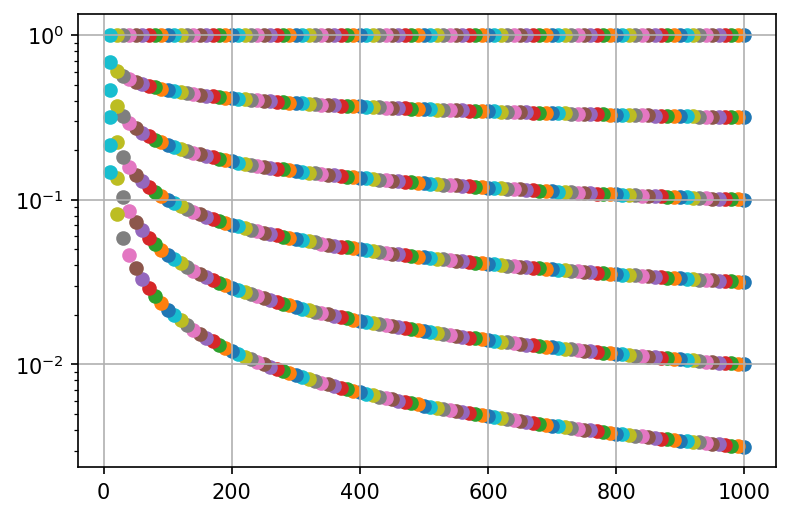

In [14]:
def get_omega_original(dimension):
    return 1 / (1e4 ** (torch.arange(0, 1, 1 / dimension)))

def get_omega_custom(dimension, max_range):
    return 1 / (max_range ** (torch.arange(0, 1, 1 / dimension)))

dim = 6
max_ranges = np.arange(1e3, 1e1 - 1, -10)

for max_range in max_ranges:
    plt.scatter([max_range] * dim, get_omega_custom(dim, max_range), )
    
plt.yscale('log')
plt.grid()